In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..')))

from src.loader import load_data
from src.hypothesis_testing import perform_t_test, perform_chi2_test

In [11]:
# Load data
filepath = '../data/raw/MachineLearningRating_v3.txt'
df = load_data(filepath)

# Hypothesis 1: Risk (TotalClaims) differences across Gender
**Null Hypothesis (H0):** There is no significant difference in TotalClaims between Male and Female.
**Alternative Hypothesis (H1):** There is a significant difference in TotalClaims between Male and Female.

In [4]:
# Data Prep: Filter relevant columns and drop missing Gender
df_gender = df[['Gender', 'TotalClaims']].dropna()
# Assuming Gender categories are 'Male' and 'Female', adjust if necessary based on EDA
# Standardizing Gender labels if needed (e.g., 'M', 'F')
# Checking unique values
print(f"Unique Gender values: {df_gender['Gender'].unique()}")

# Filtering for only Male and Female if there are other categories like 'Not specified'
df_gender = df_gender[df_gender['Gender'].isin(['Male', 'Female'])]

Unique Gender values: ['Not specified' 'Male' 'Female']


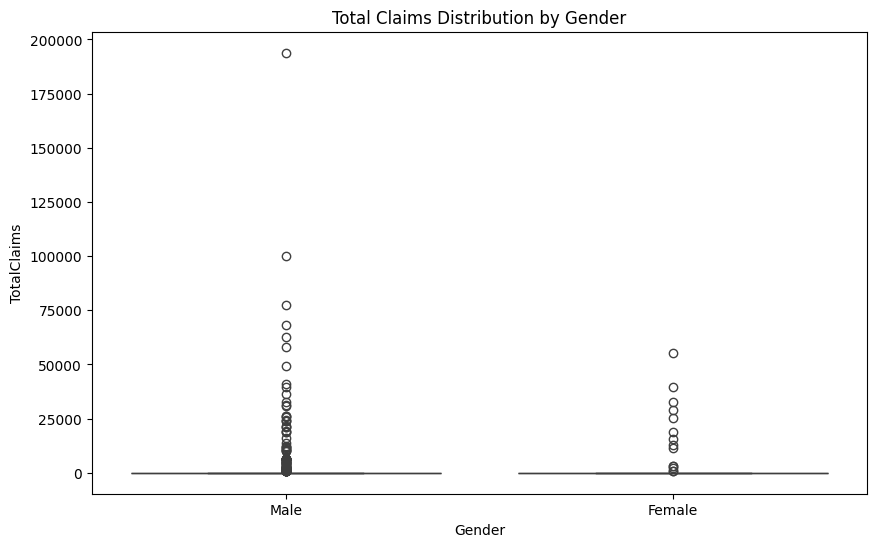

In [5]:
# Visualizing distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='TotalClaims', data=df_gender)
plt.title('Total Claims Distribution by Gender')
plt.show()

In [6]:
# Perform T-test
gender_test_results = perform_t_test(df_gender, 'Gender', 'TotalClaims')
print("Hypothesis 1 (Gender vs Claims) Results:")
print(gender_test_results)

Hypothesis 1 (Gender vs Claims) Results:
{'test': 'T-test', 'statistic': np.float64(-0.24803623812388725), 'p_value': np.float64(0.8041073961270343), 'significant': np.False_, 'interpretation': 'Fail to Reject Null Hypothesis'}


# Hypothesis 2: Risk (TotalClaims) differences across Provinces
**Null Hypothesis (H0):** TotalClaims means are equal across all Provinces.
**Alternative Hypothesis (H1):** At least one Province has a different TotalClaims mean.

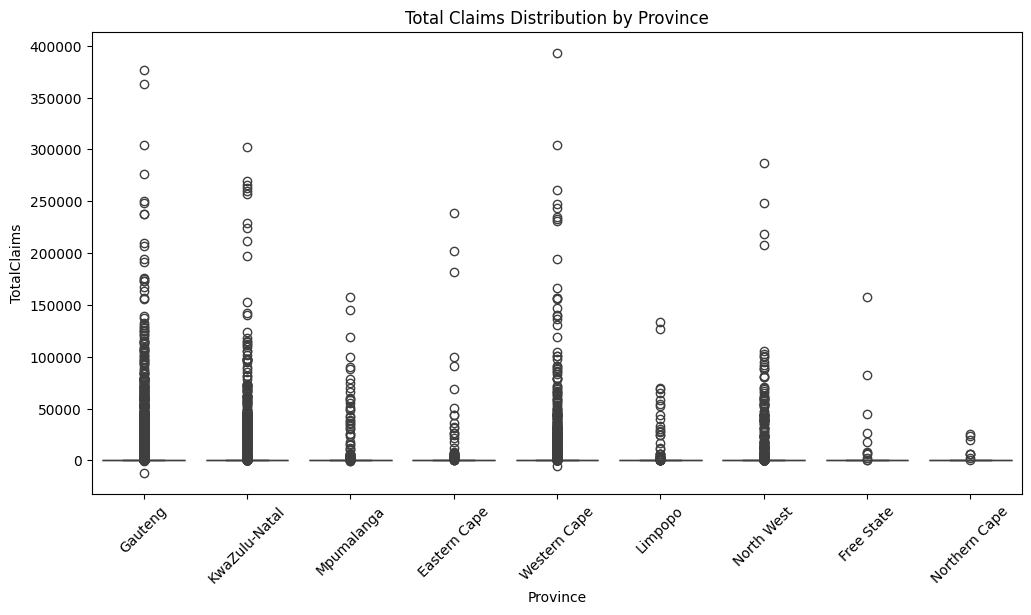

In [7]:
# Data Prep
df_province = df[['Province', 'TotalClaims']].dropna()

# Visualizing
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='TotalClaims', data=df_province)
plt.xticks(rotation=45)
plt.title('Total Claims Distribution by Province')
plt.show()

In [8]:
# ANOVA (implied by comparing multiple groups)
from src.hypothesis_testing import perform_anova
province_test_results = perform_anova(df_province, 'Province', 'TotalClaims')
print("\nHypothesis 2 (Province vs Claims) Results:")
print(province_test_results)


Hypothesis 2 (Province vs Claims) Results:
{'test': 'ANOVA', 'statistic': np.float64(5.849413762407869), 'p_value': np.float64(1.6782057588675903e-07), 'significant': np.True_, 'interpretation': 'Reject Null Hypothesis'}


# Hypothesis 3: ZipCode impact on TotalPremium
**Null Hypothesis (H0):** There is no correlation between ZipCode and TotalPremium.
**Alternative Hypothesis (H1):** There is a correlation.

In [9]:
# Since ZipCode is often categorical in nature but represented numerically, correlations might be tricky.
# We can treat zip codes as groups and do ANOVA or treat as numeric and do correlation.
# Let's try correlation first, but realistically ZipCodes are categorical regions.
# A better approach might be to bin ZipCodes or select top populated ones.
# For simplicity in this task, let's treat it as a correlation check or use ANOVA if ZipCodes are few.
# Checking unique ZipCodes
print(f"\nNumber of unique ZipCodes: {df['PostalCode'].nunique()}")

# If many, correlation is better.
df_zip = df[['PostalCode', 'TotalPremium']].dropna()
correlation = df_zip['PostalCode'].corr(df_zip['TotalPremium'])

print("\nHypothesis 3 (ZipCode vs Premium) Results:")
print(f"Correlation: {correlation}")
if abs(correlation) > 0.1: # Weak threshold
    print("Interpretation: There is some relationship.")
else:
    print("Interpretation: Little to no linear relationship.")


Number of unique ZipCodes: 888

Hypothesis 3 (ZipCode vs Premium) Results:
Correlation: 0.007393844690924603
Interpretation: Little to no linear relationship.
